# AI for Finance - Project 3

1-plot AUROC values and AUROC gains with quintile failures for all the models

2-plot wald statistics between models

3-ROC of each model at forecast horizon of 4 quarters with >80 percentile dataset

4-print variables with the best contribution for the best model at each forecast horizon

## Preparing the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('project3_data.xlsx')
data

,obs,Failed_to_Active_banks,fed,gdp,sp500_dev,ld_gdp,d_fedFunds_rate,XMRET,EBP,TERM_SPREAD,Net Interest Margin for all Commerical Banks,Return on Equity,Loan Loss Reserve to Total Loans for all U.S. Banks; Percent,Provision for Loan and Lease Losses (Percent Change),"Allowance for Loan and Lease Losses , Percent Change, Quarterly"
0,1984Q1,0.001311,9.91,7488.167,2.806596,NaN,NaN,-4.37743,-0.059075,2.763280,3.78,11.97,1.17,66.5,5.0
1,1984Q2,0.001380,11.06,7617.547,3.060282,0.017130,1.15,-3.85652,-0.137982,3.335238,3.87,10.57,1.18,-5.6,3.1
2,1984Q3,0.001311,11.30,7690.985,3.070507,0.009594,0.24,2.78496,-0.027158,2.522857,3.91,11.11,1.20,45.2,7.4
3,1984Q4,0.001380,8.38,7754.117,3.207637,0.008175,-2.92,2.72449,-0.124229,2.952842,3.95,10.56,1.24,-38.2,4.2
4,1985Q1,0.001942,8.58,7829.260,3.955004,0.009644,0.20,8.15211,-0.096690,3.405333,3.97,12.31,1.29,44.7,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2019Q4,0.000000,1.55,19202.310,9.920250,0.004680,-0.49,3.58165,-0.241928,0.208118,3.31,11.38,1.15,253.0,59.5
144,2020Q1,0.000229,0.65,18951.992,10.873375,-0.013122,-0.90,-1.28230,0.266885,0.282097,3.06,3.22,1.76,18.0,24.8
145,2020Q2,0.000229,0.08,17258.205,12.187815,-0.093621,-0.57,-4.35650,0.368691,0.545397,2.89,3.21,2.19,-76.8,0.4
146,2020Q3,0.000229,0.09,18560.774,11.587276,0.072763,0.01,14.42143,-0.148728,0.537813,2.88,5.31,2.22,-77.7,0.0


In [3]:
#Cleaning columns name
data.rename(columns = {'obs':'Date', 'Failed_to_Active_banks':'Failure rate','sp500_dev':'Sp500',
                      'd_fedFunds_rate':'D_fed','TERM_SPREAD':'Term',
                      'Net Interest Margin for all Commerical Banks':'Net interest','Return on Equity':'ROE',
                      'Loan Loss Reserve to Total Loans for all U.S. Banks; Percent':'LL Reserve',
                      'Provision for Loan and Lease Losses (Percent Change)':'LL Provision',
                      'Allowance for Loan and Lease Losses , Percent Change, Quarterly':'LL Allowance'}, inplace = True)
data

,Date,Failure rate,fed,gdp,Sp500,ld_gdp,D_fed,XMRET,EBP,Term,Net interest,Return on Equity,LL Reserve,LL Provision,LL Allowance
0,1984Q1,0.001311,9.91,7488.167,2.806596,NaN,NaN,-4.37743,-0.059075,2.763280,3.78,11.97,1.17,66.5,5.0
1,1984Q2,0.001380,11.06,7617.547,3.060282,0.017130,1.15,-3.85652,-0.137982,3.335238,3.87,10.57,1.18,-5.6,3.1
2,1984Q3,0.001311,11.30,7690.985,3.070507,0.009594,0.24,2.78496,-0.027158,2.522857,3.91,11.11,1.20,45.2,7.4
3,1984Q4,0.001380,8.38,7754.117,3.207637,0.008175,-2.92,2.72449,-0.124229,2.952842,3.95,10.56,1.24,-38.2,4.2
4,1985Q1,0.001942,8.58,7829.260,3.955004,0.009644,0.20,8.15211,-0.096690,3.405333,3.97,12.31,1.29,44.7,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2019Q4,0.000000,1.55,19202.310,9.920250,0.004680,-0.49,3.58165,-0.241928,0.208118,3.31,11.38,1.15,253.0,59.5
144,2020Q1,0.000229,0.65,18951.992,10.873375,-0.013122,-0.90,-1.28230,0.266885,0.282097,3.06,3.22,1.76,18.0,24.8
145,2020Q2,0.000229,0.08,17258.205,12.187815,-0.093621,-0.57,-4.35650,0.368691,0.545397,2.89,3.21,2.19,-76.8,0.4
146,2020Q3,0.000229,0.09,18560.774,11.587276,0.072763,0.01,14.42143,-0.148728,0.537813,2.88,5.31,2.22,-77.7,0.0


In [4]:
#removing NA values
data.dropna(inplace=True)
data

,Date,Failure rate,fed,gdp,Sp500,ld_gdp,D_fed,XMRET,EBP,Term,Net interest,Return on Equity,LL Reserve,LL Provision,LL Allowance
1,1984Q2,0.001380,11.06,7617.547,3.060282,0.017130,1.15,-3.85652,-0.137982,3.335238,3.87,10.57,1.18,-5.6,3.1
2,1984Q3,0.001311,11.30,7690.985,3.070507,0.009594,0.24,2.78496,-0.027158,2.522857,3.91,11.11,1.20,45.2,7.4
3,1984Q4,0.001380,8.38,7754.117,3.207637,0.008175,-2.92,2.72449,-0.124229,2.952842,3.95,10.56,1.24,-38.2,4.2
4,1985Q1,0.001942,8.58,7829.260,3.955004,0.009644,0.20,8.15211,-0.096690,3.405333,3.97,12.31,1.29,44.7,7.3
5,1985Q2,0.002012,7.53,7898.194,3.405234,0.008766,-1.05,4.51245,-0.131578,3.331270,4.04,12.05,1.35,0.0,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2019Q4,0.000000,1.55,19202.310,9.920250,0.004680,-0.49,3.58165,-0.241928,0.208118,3.31,11.38,1.15,253.0,59.5
144,2020Q1,0.000229,0.65,18951.992,10.873375,-0.013122,-0.90,-1.28230,0.266885,0.282097,3.06,3.22,1.76,18.0,24.8
145,2020Q2,0.000229,0.08,17258.205,12.187815,-0.093621,-0.57,-4.35650,0.368691,0.545397,2.89,3.21,2.19,-76.8,0.4
146,2020Q3,0.000229,0.09,18560.774,11.587276,0.072763,0.01,14.42143,-0.148728,0.537813,2.88,5.31,2.22,-77.7,0.0


In [5]:
#print some information about the dataset
data.describe()

,Failure rate,fed,gdp,Sp500,ld_gdp,D_fed,XMRET,EBP,Term,Net interest,Return on Equity,LL Reserve,LL Provision,LL Allowance
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,0.001245,3.627075,13346.481776,7.900436,0.006250,-0.066803,2.333891,0.078261,1.809133,3.746939,11.102109,1.952857,2.458503,2.049660
std,0.001496,2.949588,3441.991303,3.082875,0.011498,0.542252,6.211784,0.574277,1.088790,0.465636,4.139808,0.601235,63.563988,8.333957
min,0.000000,0.070000,7617.547000,2.915665,-0.093621,-2.920000,-28.383540,-0.770896,-0.472366,2.820000,-5.940000,1.150000,-551.100000,-5.800000
25%,0.000124,0.720000,9938.219000,6.305823,0.004254,-0.200000,-0.480145,-0.256921,0.913175,3.345000,8.970000,1.435000,-10.700000,-1.050000
50%,0.000383,3.220000,13531.741000,7.576040,0.007087,0.000000,2.784960,-0.072034,1.765269,3.820000,11.850000,1.820000,0.800000,0.100000
75%,0.002180,5.580000,15962.770500,9.185033,0.009650,0.145000,6.098150,0.205722,2.686553,4.085000,14.545000,2.450000,15.500000,1.850000
max,0.005216,11.300000,19202.310000,20.721805,0.072763,1.150000,14.421430,3.360336,3.644409,4.910000,16.290000,3.700000,332.300000,59.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 1 to 147
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               147 non-null    object 
 1   Failure rate       147 non-null    float64
 2   fed                147 non-null    float64
 3   gdp                147 non-null    float64
 4   Sp500              147 non-null    float64
 5   ld_gdp             147 non-null    float64
 6   D_fed              147 non-null    float64
 7   XMRET              147 non-null    float64
 8   EBP                147 non-null    float64
 9   Term               147 non-null    float64
 10  Net interest       147 non-null    float64
 11  Return on Equity   147 non-null    float64
 12  LL Reserve         147 non-null    float64
 13  LL Provision       147 non-null    float64
 14  LL Allowance       147 non-null    float64
dtypes: float64(14), object(1)
memory usage: 18.4+ KB


<AxesSubplot:title={'center':'Correlation Matrix'}>

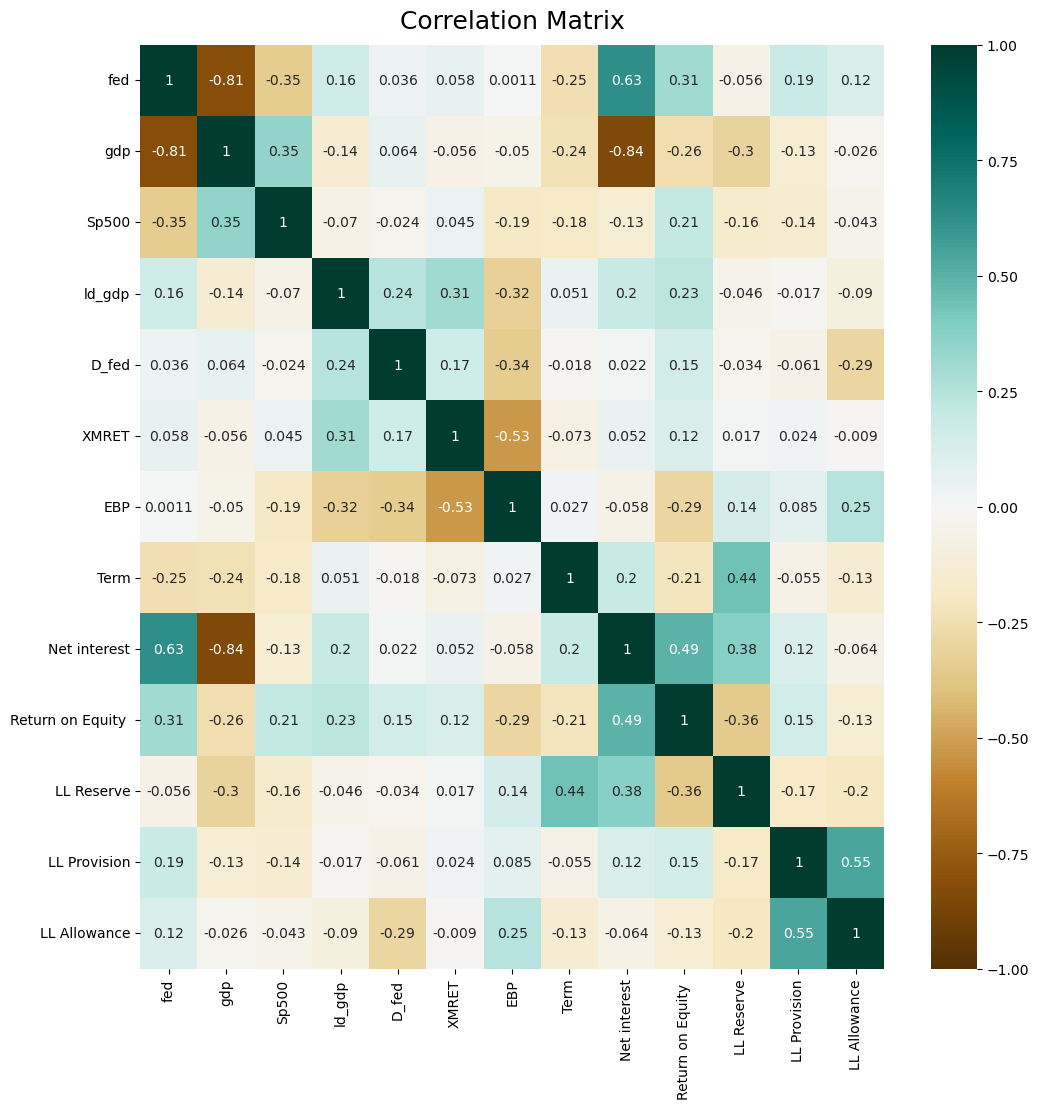

In [7]:
#Plotting the correlation matrix
normalized_data=(data.iloc[:,2:]-data.iloc[:,2:].mean())/data.iloc[:,2:].std()

plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(normalized_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':18}, pad=12);

heatmap

In [8]:
#Dropping multi-collinear columns (gdp and fed)
data.drop(labels=['fed','gdp'], axis=1, inplace=True)
data.reset_index(drop=True, inplace=True)
data

,Date,Failure rate,Sp500,ld_gdp,D_fed,XMRET,EBP,Term,Net interest,Return on Equity,LL Reserve,LL Provision,LL Allowance
0,1984Q2,0.001380,3.060282,0.017130,1.15,-3.85652,-0.137982,3.335238,3.87,10.57,1.18,-5.6,3.1
1,1984Q3,0.001311,3.070507,0.009594,0.24,2.78496,-0.027158,2.522857,3.91,11.11,1.20,45.2,7.4
2,1984Q4,0.001380,3.207637,0.008175,-2.92,2.72449,-0.124229,2.952842,3.95,10.56,1.24,-38.2,4.2
3,1985Q1,0.001942,3.955004,0.009644,0.20,8.15211,-0.096690,3.405333,3.97,12.31,1.29,44.7,7.3
4,1985Q2,0.002012,3.405234,0.008766,-1.05,4.51245,-0.131578,3.331270,4.04,12.05,1.35,0.0,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,2019Q4,0.000000,9.920250,0.004680,-0.49,3.58165,-0.241928,0.208118,3.31,11.38,1.15,253.0,59.5
143,2020Q1,0.000229,10.873375,-0.013122,-0.90,-1.28230,0.266885,0.282097,3.06,3.22,1.76,18.0,24.8
144,2020Q2,0.000229,12.187815,-0.093621,-0.57,-4.35650,0.368691,0.545397,2.89,3.21,2.19,-76.8,0.4
145,2020Q3,0.000229,11.587276,0.072763,0.01,14.42143,-0.148728,0.537813,2.88,5.31,2.22,-77.7,0.0


In [9]:
#Failure rate in percentage
data['Failure rate'] = data['Failure rate'] * 100
data

,Date,Failure rate,Sp500,ld_gdp,D_fed,XMRET,EBP,Term,Net interest,Return on Equity,LL Reserve,LL Provision,LL Allowance
0,1984Q2,0.137969,3.060282,0.017130,1.15,-3.85652,-0.137982,3.335238,3.87,10.57,1.18,-5.6,3.1
1,1984Q3,0.131071,3.070507,0.009594,0.24,2.78496,-0.027158,2.522857,3.91,11.11,1.20,45.2,7.4
2,1984Q4,0.137969,3.207637,0.008175,-2.92,2.72449,-0.124229,2.952842,3.95,10.56,1.24,-38.2,4.2
3,1985Q1,0.194215,3.955004,0.009644,0.20,8.15211,-0.096690,3.405333,3.97,12.31,1.29,44.7,7.3
4,1985Q2,0.201151,3.405234,0.008766,-1.05,4.51245,-0.131578,3.331270,4.04,12.05,1.35,0.0,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,2019Q4,0.000000,9.920250,0.004680,-0.49,3.58165,-0.241928,0.208118,3.31,11.38,1.15,253.0,59.5
143,2020Q1,0.022857,10.873375,-0.013122,-0.90,-1.28230,0.266885,0.282097,3.06,3.22,1.76,18.0,24.8
144,2020Q2,0.022857,12.187815,-0.093621,-0.57,-4.35650,0.368691,0.545397,2.89,3.21,2.19,-76.8,0.4
145,2020Q3,0.022857,11.587276,0.072763,0.01,14.42143,-0.148728,0.537813,2.88,5.31,2.22,-77.7,0.0


In [10]:
feature_names = data.columns.values.tolist()
feature_names = feature_names[2:]
feature_names

['Sp500',
 'ld_gdp',
 'D_fed',
 'XMRET',
 'EBP',
 'Term',
 'Net interest',
 'Return on Equity ',
 'LL Reserve',
 'LL Provision',
 'LL Allowance']

## Predicting Models

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,r2_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay,roc_auc_score,roc_curve,auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#setting lags 
lag_periods = range(1,7) #6 lags
min_thresholds = [0.0,0.0652,0.1956,0.3260,0.4563]
max_thresholds = [0.0652,0.1956,0.3260,0.4563,1.0]

In [12]:
#normalized data
normalized_data.drop(labels=['fed','gdp'], axis=1, inplace=True)
normalized_data.reset_index(drop=True, inplace=True)
normalized_data

,Sp500,ld_gdp,D_fed,XMRET,EBP,Term,Net interest,Return on Equity,LL Reserve,LL Provision,LL Allowance
0,-1.570013,0.946231,2.243981,-0.996559,-0.376547,1.401653,0.264286,-0.128535,-1.285449,-0.126778,0.126031
1,-1.566697,0.290830,0.565794,0.072615,-0.183567,0.655521,0.350190,0.001906,-1.252184,0.672417,0.641993
2,-1.522215,0.167384,-5.261758,0.062880,-0.352600,1.050440,0.436094,-0.130950,-1.185655,-0.639647,0.258021
3,-1.279790,0.295144,0.492027,0.936642,-0.304645,1.466032,0.479046,0.291775,-1.102493,0.664551,0.629994
4,-1.458120,0.218789,-1.813175,0.350714,-0.365397,1.398008,0.629378,0.228970,-1.002698,-0.038678,0.366013
...,...,...,...,...,...,...,...,...,...,...,...
142,0.655172,-0.136583,-0.780444,0.200870,-0.557552,-1.470453,-0.938369,0.067127,-1.335347,3.941564,6.893525
143,0.964340,-1.684793,-1.536551,-0.582150,0.328454,-1.402507,-1.475269,-1.903979,-0.320768,0.244502,2.729836
144,1.390708,-8.685906,-0.927977,-1.077048,0.505731,-1.160679,-1.840360,-1.906395,0.394426,-1.246909,-0.197944
145,1.195910,5.784610,0.141637,1.945905,-0.395260,-1.167645,-1.861836,-1.399125,0.444324,-1.261068,-0.245941


In [13]:
#Create buckets for binary-classification 
# <=0.0652%  --> really low risk
# 0.0652-0.1956 --> low risk
# 0.1957-0.3260 --> medium risk
# 0.3261-0.4564 --> high risk
# >=0.4564 --> really high risk

failure_buckets = pd.DataFrame(np.zeros((len(data['Failure rate']), 5)))
failure_buckets.rename(columns = {0:'low low risk',1:'low risk',2:'medium risk',
                                  3:'high risk',4:'high high risk'}, inplace = True)

failure_list = list(data['Failure rate'])
for i in range(0,len(failure_list)):
    if(failure_list[i] <= 0.0652):
        failure_buckets['low low risk'][i] = 1
    elif(failure_list[i] > 0.0652 and failure_list[i] <= 0.1956):
        failure_buckets['low risk'][i] = 1
    elif(failure_list[i] > 0.1956 and failure_list[i] <= 0.3260):
        failure_buckets['medium risk'][i] = 1
    elif(failure_list[i] > 0.3260 and failure_list[i] <= 0.4563):
        failure_buckets['high risk'][i] = 1
    elif(failure_list[i] > 0.4563):
        failure_buckets['high high risk'][i] = 1
failure_buckets

,low low risk,low risk,medium risk,high risk,high high risk
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
142,1.0,0.0,0.0,0.0,0.0
143,1.0,0.0,0.0,0.0,0.0
144,1.0,0.0,0.0,0.0,0.0
145,1.0,0.0,0.0,0.0,0.0


In [14]:
#categorical classes for the dependent variable
classes = []

for i in range(0,len(failure_list)):
    if(failure_list[i] <= 0.0652):
        classes.append('low low risk')
    elif(failure_list[i] > 0.0652 and failure_list[i] <= 0.1956):
        classes.append('low risk')
    elif(failure_list[i] > 0.1956 and failure_list[i] <= 0.3260):
        classes.append('medium risk')
    elif(failure_list[i] > 0.3260 and failure_list[i] <= 0.4563):
        classes.append('high risk')
    elif(failure_list[i] > 0.4563):
        classes.append('high high risk')
        
classes[0]

'low risk'

In [15]:
#function to run the selected classifier and print the roc curve and feature importance for each forecast horizon
def Run_Model(model, display=True, feature_ranking=True):
    
    auc_values = [] #storing the auc values for each lag
    micros = []
    
    for lag, color in zip(lag_periods,['red','green','blue','orange','purple','cyan']):

        X = normalized_data.iloc[:-lag,:]
        y = classes[lag:]

        X_train,X_test,Y_train,Y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=False);

        classifier = model
        y_score = classifier.fit(X_train, Y_train).predict_proba(X_test)

        label_binarizer = LabelBinarizer().fit(Y_train)
        y_onehot_test = label_binarizer.transform(Y_test)

        # Compute micro-average ROC curve and ROC area
        fpr, tpr, threshold = roc_curve(y_onehot_test.ravel(), y_score.ravel())
        micros.append(threshold)
        
        roc_auc = auc(fpr, tpr)
        auc_values.append(roc_auc)
        
        if(display == True):
            #plt.plot(fpr['micro'], tpr["micro"], label='%d LAG (AUC = %0.2f)' % (lag, roc_auc["micro"]))
            RocCurveDisplay.from_predictions(y_onehot_test.ravel(),y_score.ravel(),name=str(lag) + " lag",color=color)    
            plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
            plt.axis("square")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
            plt.legend()
            plt.show()
        
        if(feature_ranking == True):
            
            #feature ranking with one-vs-rest cross validation
            n_features = len(X.columns)
            scores_list = []
            for i in range(n_features):
                X_one = pd.DataFrame(X_train.iloc[:,i])
                scores = cross_val_score(classifier, X_one, Y_train, cv=3)
                scores_list.append((X.columns.values[i],scores.mean()))
                
            #display feature ranking
            score_df = pd.DataFrame(scores_list)
            score_df.columns=['Feature','Score']
            score_df = score_df.sort_values(by=['Score'], ascending=False)
            sns.barplot(data=score_df, x="Score", y="Feature")
    
    return auc_values, micros

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

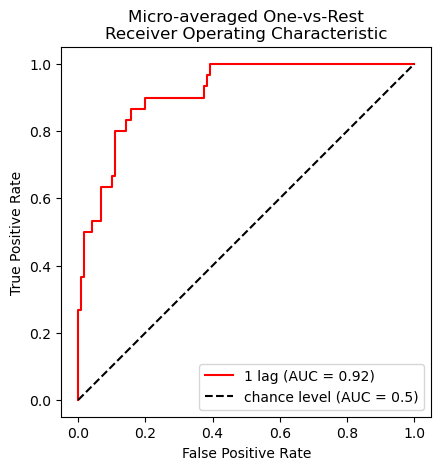

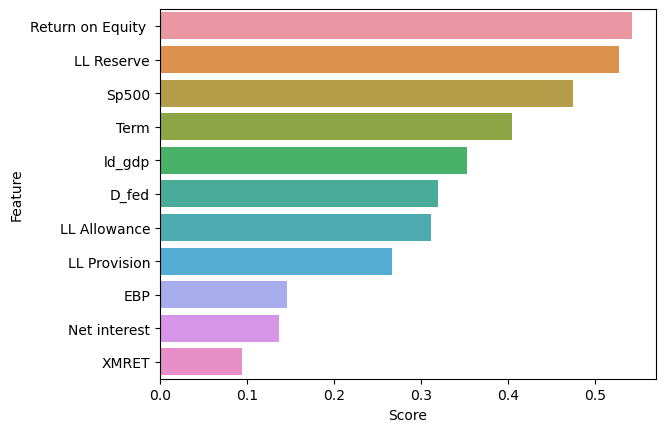

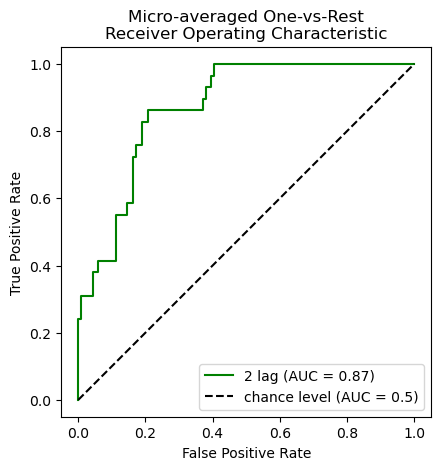

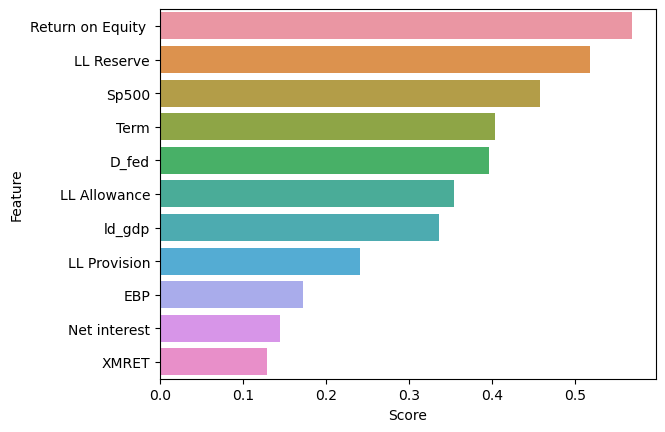

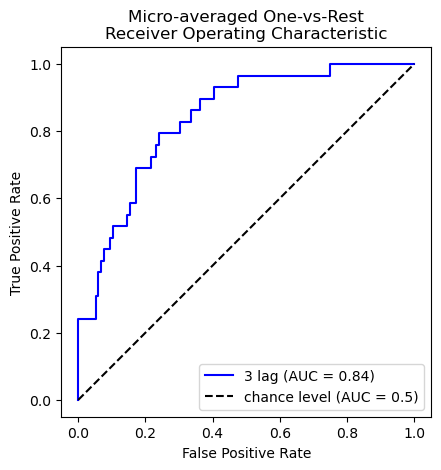

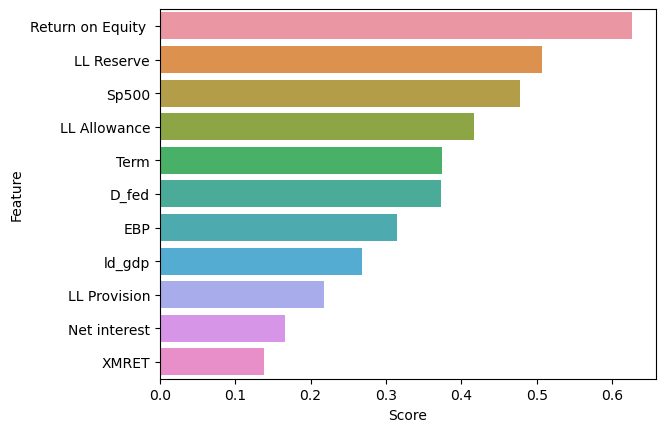

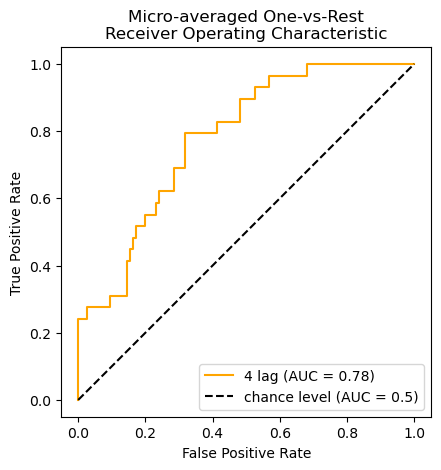

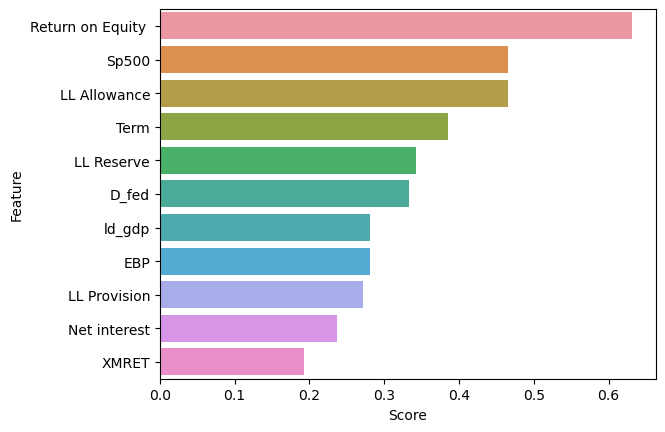

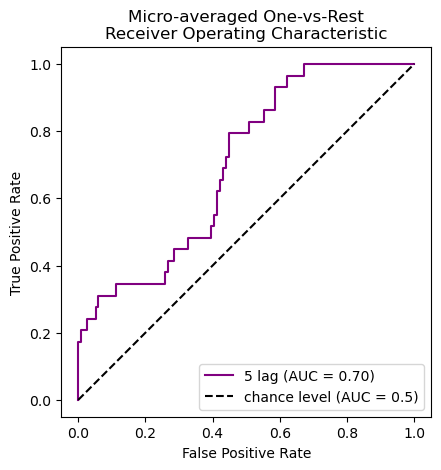

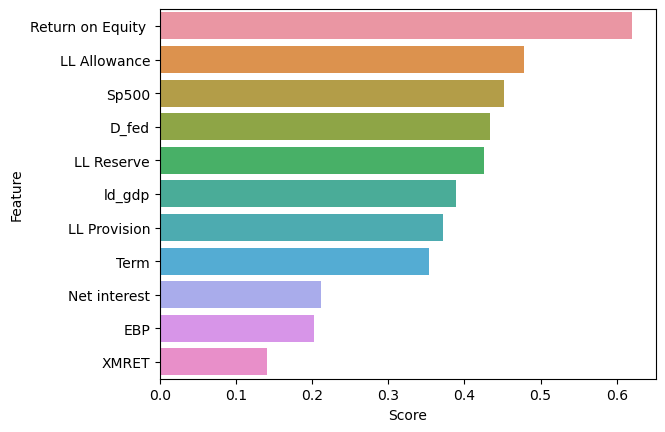

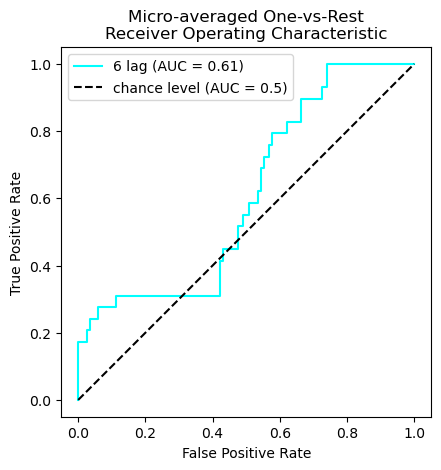

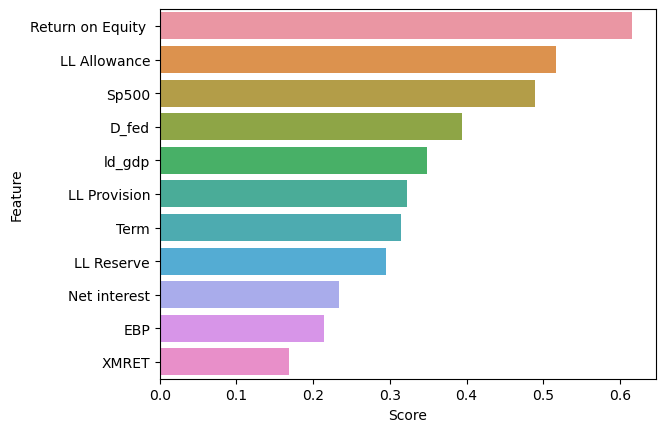

In [17]:
classifier = LogisticRegression(penalty='l2', C=0.1, class_weight='balanced', random_state=42, multi_class='ovr', solver='lbfgs')
LR_auc_values, LR_micros = Run_Model(classifier)

In [18]:
print(LR_auc_values)

[0.9161111111111111, 0.8715814506539834, 0.8376932223543401, 0.7791319857312723, 0.6985731272294886, 0.6085017835909632]


### Multilayer Perceptron (MLP) model

In [19]:
from sklearn.neural_network import MLPClassifier

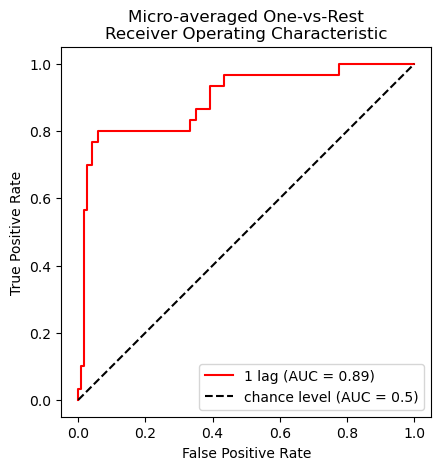

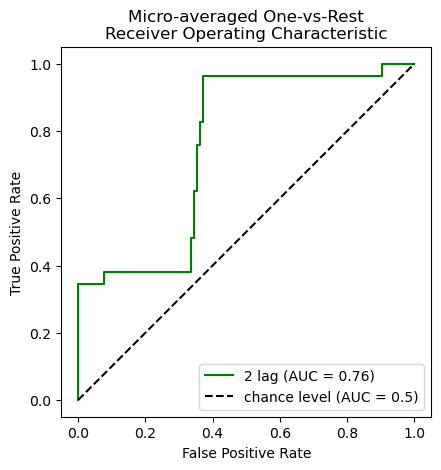

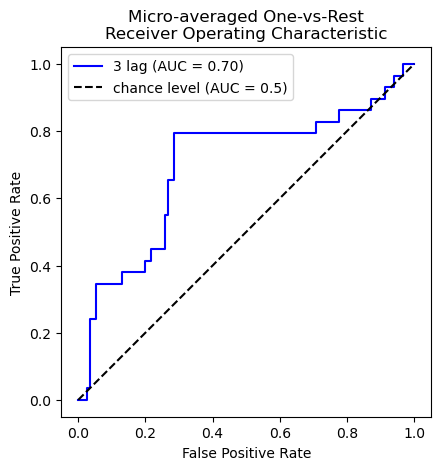

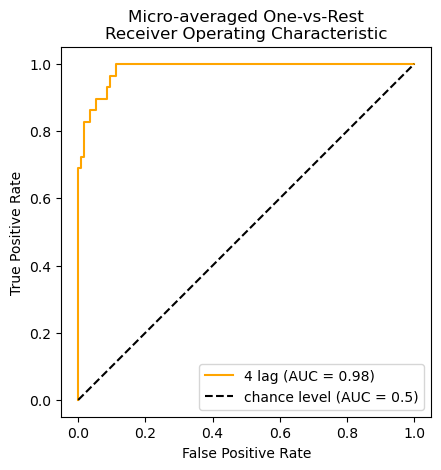

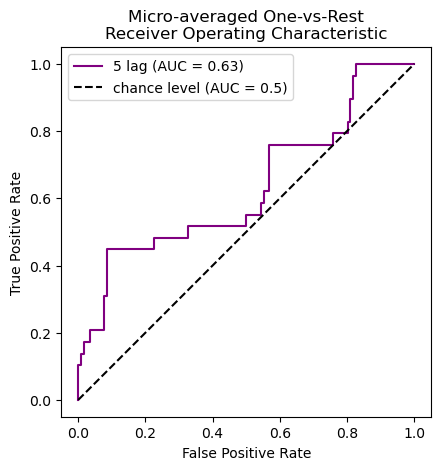

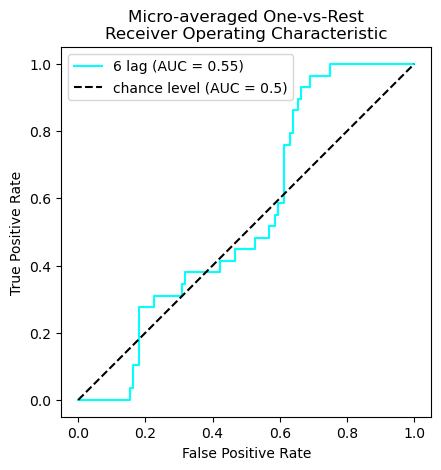

In [20]:
classifier = MLPClassifier(hidden_layer_sizes=(8,5,5), verbose=False, learning_rate_init=0.1, activation='tanh', max_iter=1000)
MLP_auc_values, MLP_micros = Run_Model(classifier, feature_ranking=False)

In [21]:
print(MLP_auc_values)

[0.8944444444444445, 0.7589179548156957, 0.69589774078478, 0.9848394768133175, 0.6307966706302022, 0.5472651605231867]


### Random Forest model

In [22]:
from sklearn.ensemble import RandomForestClassifier

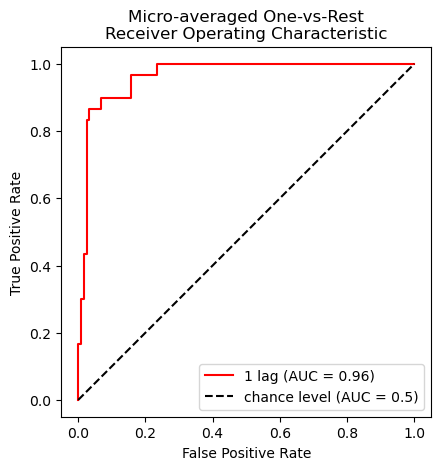

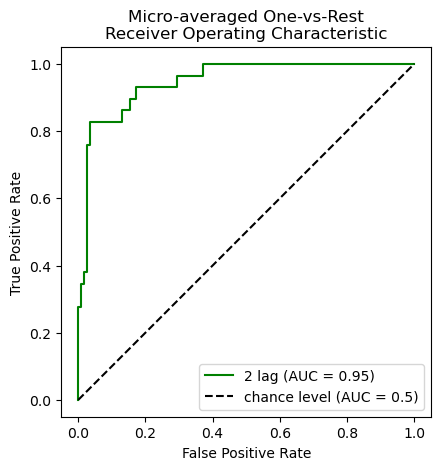

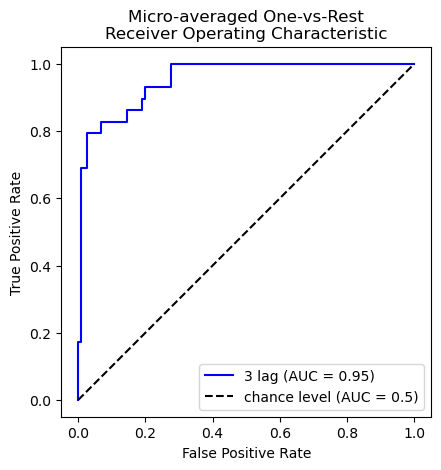

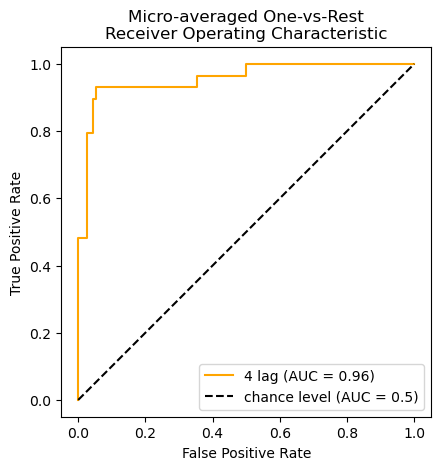

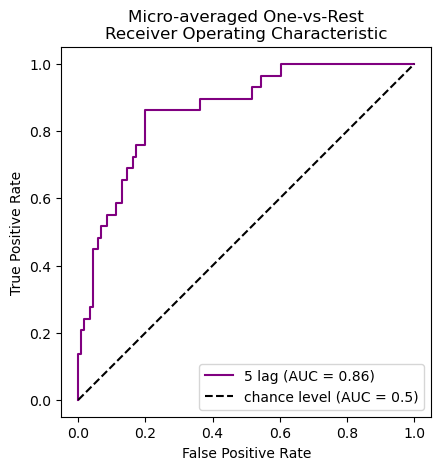

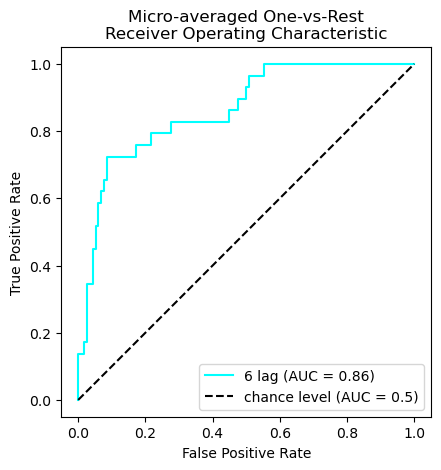

In [23]:
classifier = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=2, random_state=42)
RF_auc_values, RF_micros = Run_Model(classifier, feature_ranking=False)

In [24]:
print(RF_auc_values)

[0.9649999999999999, 0.9479785969084423, 0.9530321046373365, 0.9563020214030915, 0.8629607609988109, 0.8632580261593341]


### Support vector machine (SVM) model

In [25]:
from sklearn.svm import SVC

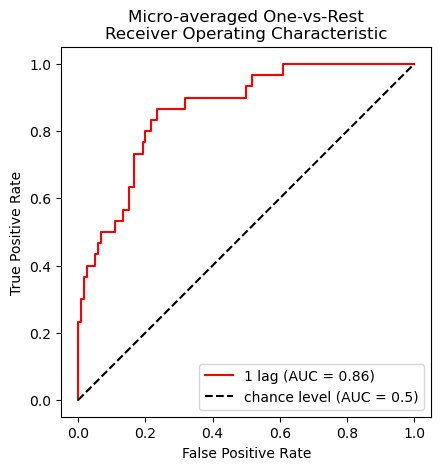

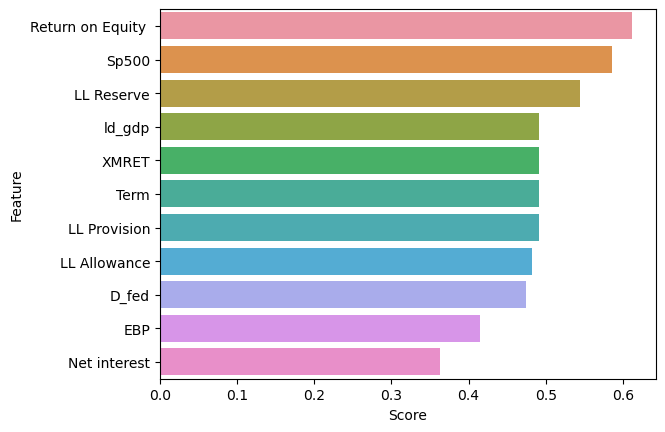

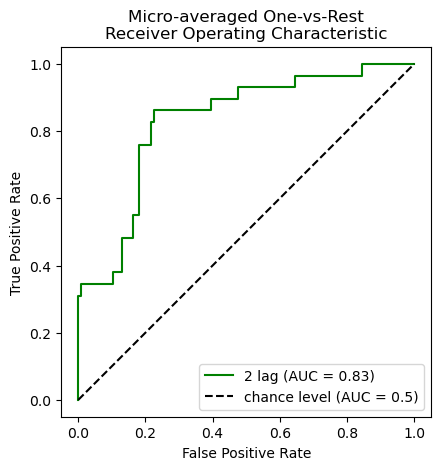

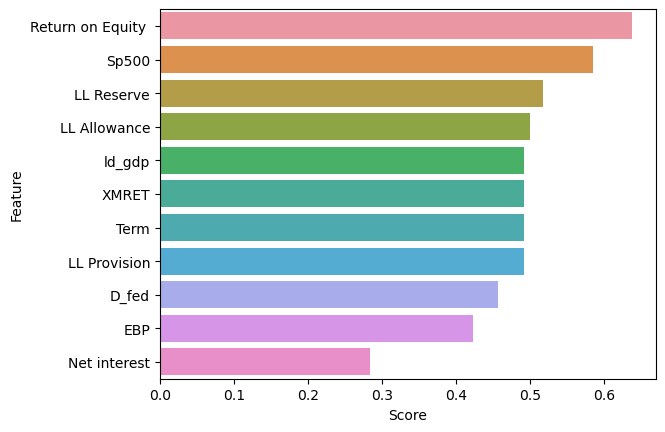

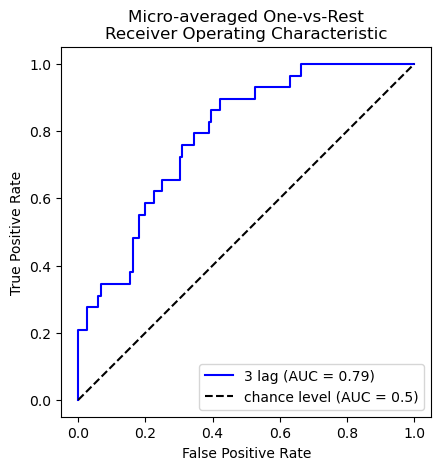

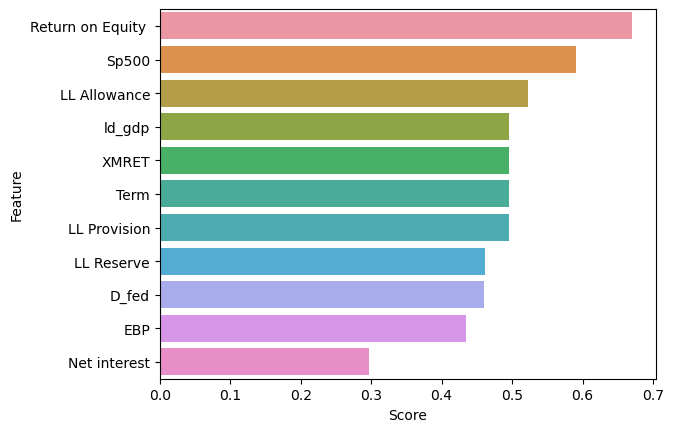

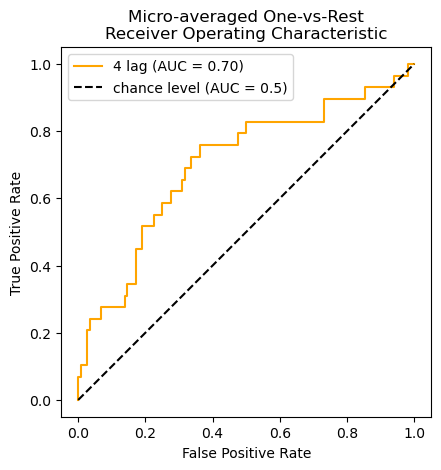

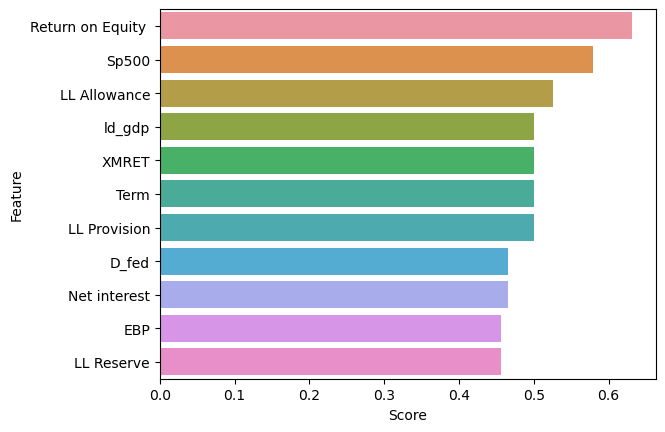

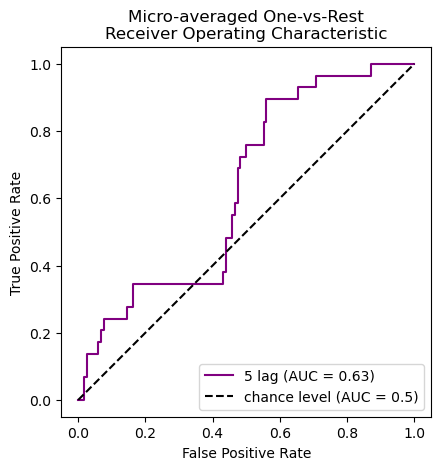

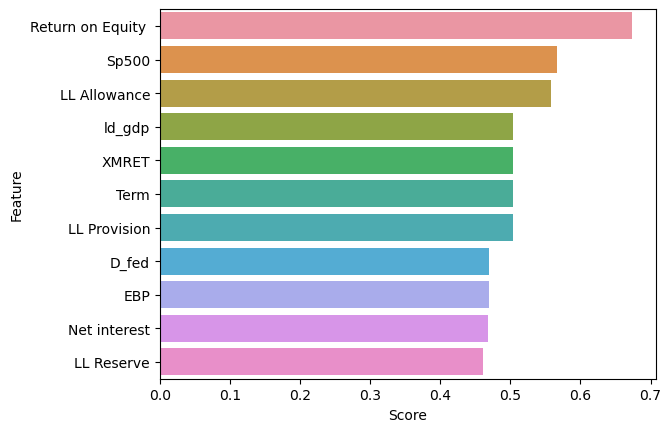

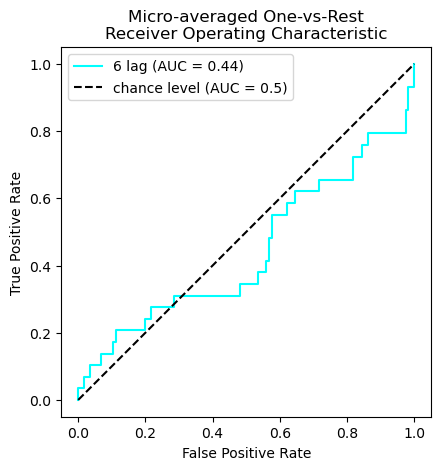

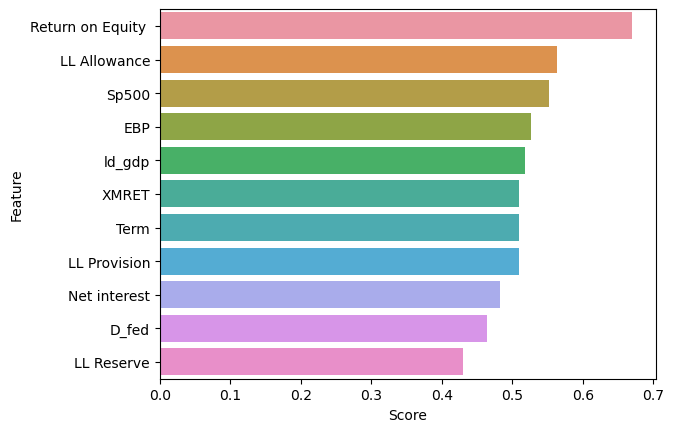

In [26]:
classifier = SVC(C=1.0, kernel='linear', degree=2, random_state=42, probability=True)
SVM_auc_values, SVM_micros = Run_Model(classifier)

In [27]:
print(SVM_auc_values)

[0.8641666666666667, 0.8299643281807372, 0.7880499405469679, 0.7012485136741974, 0.629013079667063, 0.4432223543400714]


### K-Nearest Neighbors (KNN) model

In [28]:
from sklearn.neighbors import KNeighborsClassifier

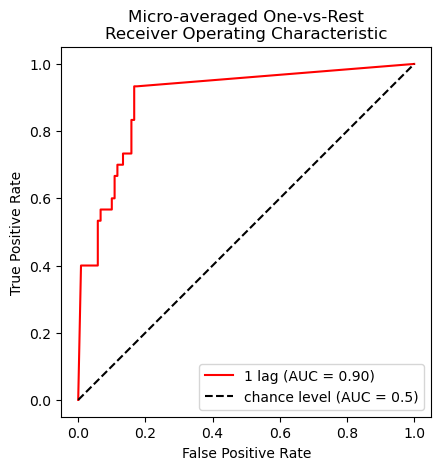

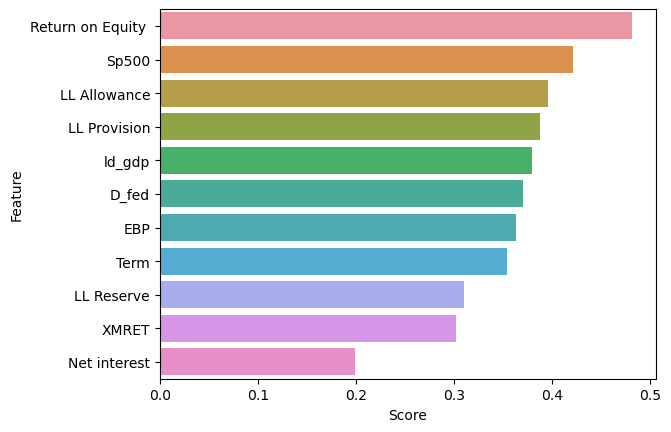

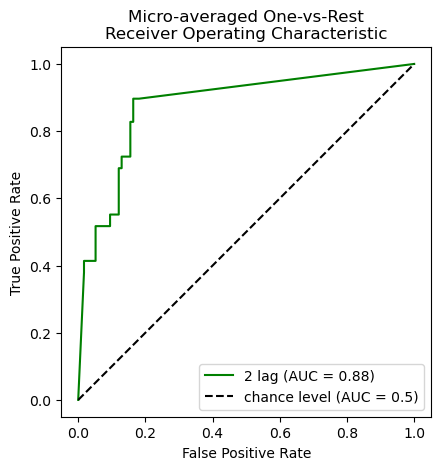

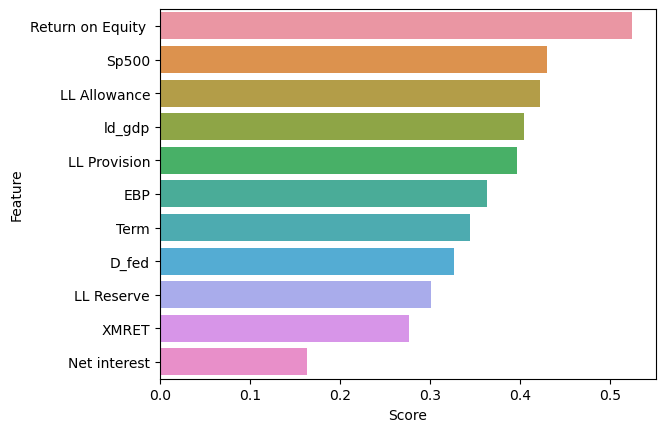

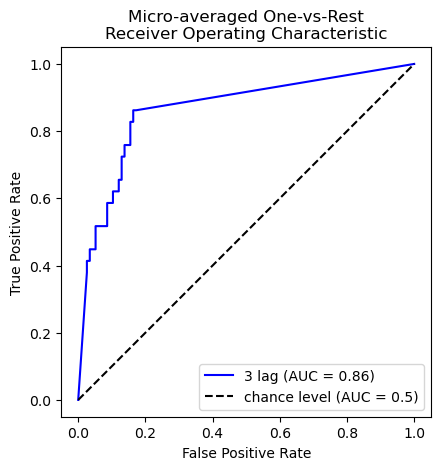

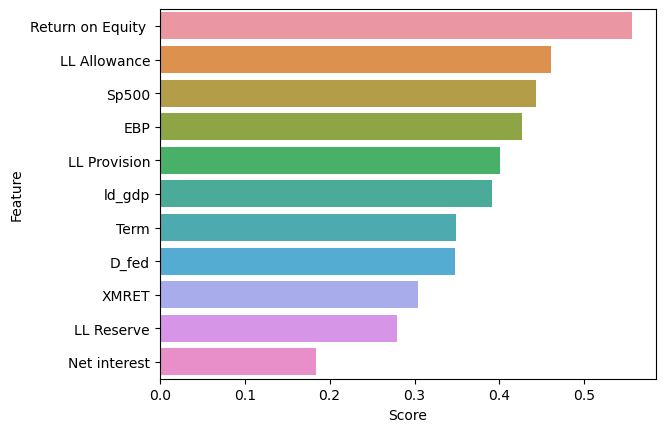

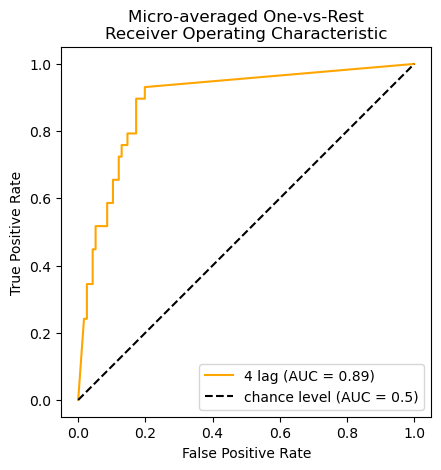

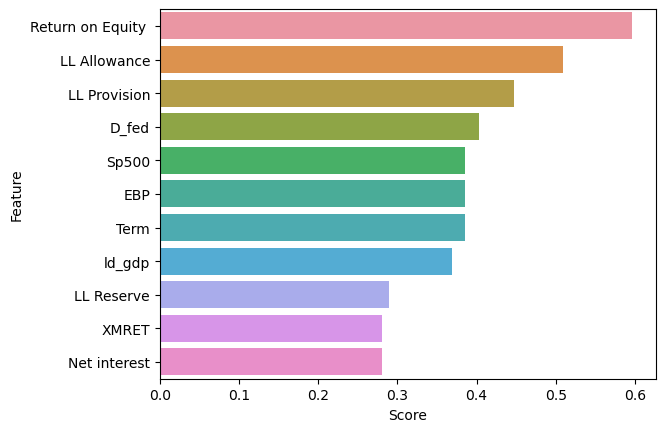

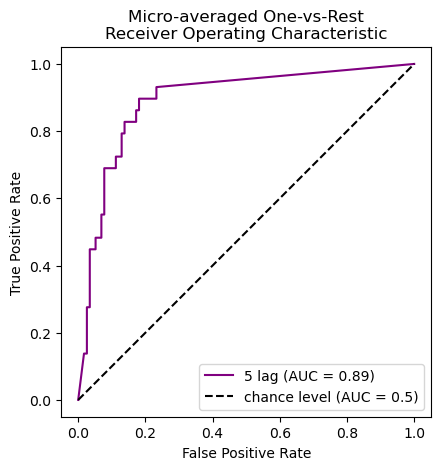

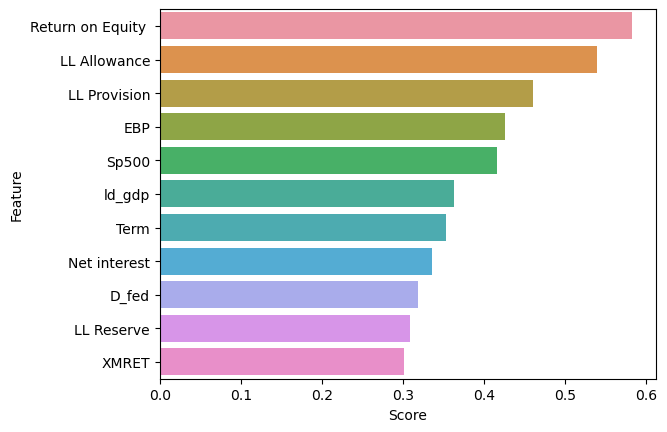

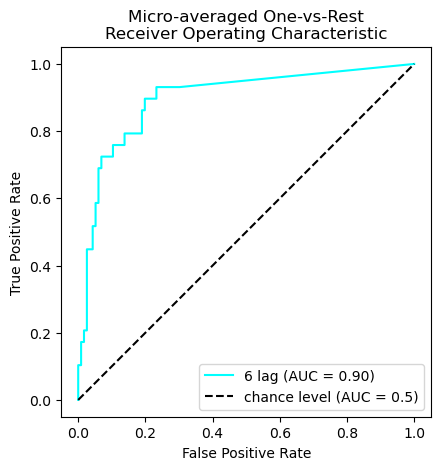

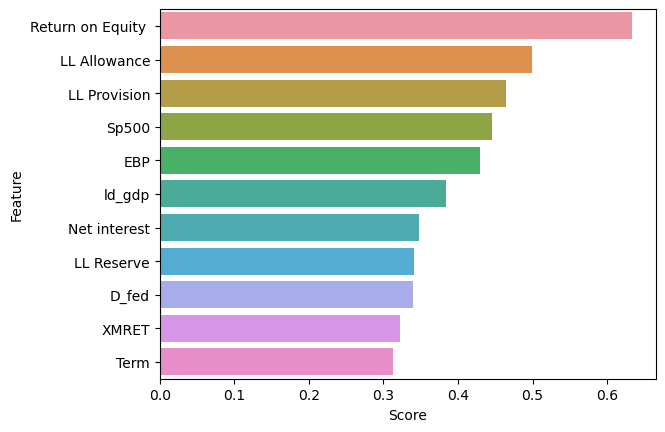

In [29]:
classifier = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)
KNN_auc_values, KNN_micros = Run_Model(classifier)

In [30]:
print(KNN_auc_values)

[0.8977777777777778, 0.877972651605232, 0.8648929845422116, 0.890309155766944, 0.8917954815695601, 0.8962544589774079]


### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

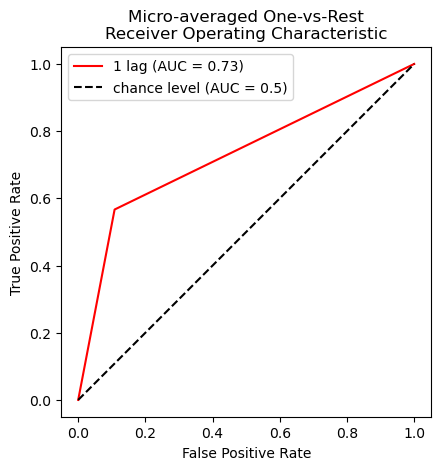

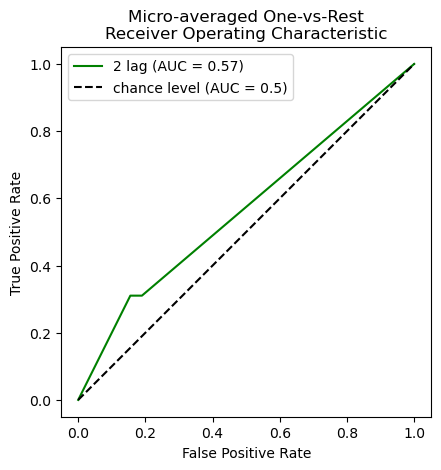

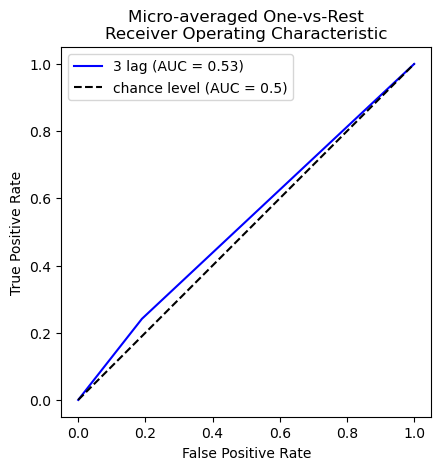

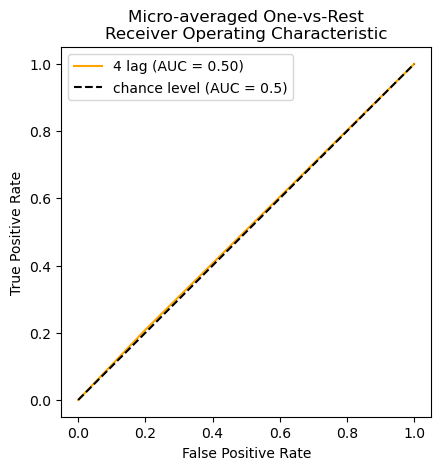

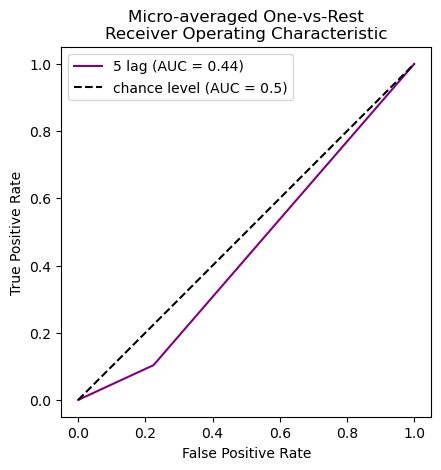

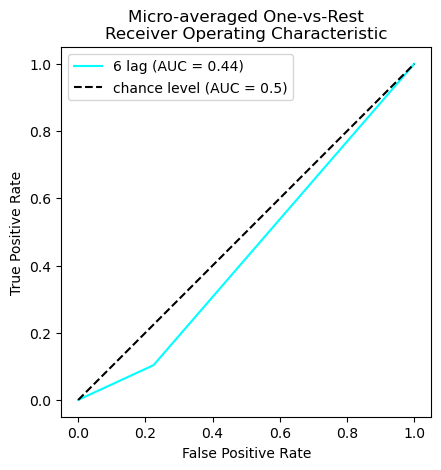

In [32]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=2, random_state=42)
DT_auc_values, DT_micros = Run_Model(classifier, feature_ranking=False)

In [33]:
print(DT_auc_values)

[0.7291666666666666, 0.5656956004756242, 0.5258620689655172, 0.5043103448275862, 0.4396551724137931, 0.4396551724137931]


## Plotting AUC values and AUC gains

In [34]:
#plotting auroc values
auroc_values = pd.DataFrame()
auroc_values['models'] = ['Logistic Regression','MLP','Decision Tree','Random Forest','SVM','KNN']
for lag in lag_periods:
    auroc_values[str(lag) + ' Quarter'] = [LR_auc_values[lag-1],MLP_auc_values[lag-1],DT_auc_values[lag-1],RF_auc_values[lag-1],SVM_auc_values[lag-1],KNN_auc_values[lag-1]]
auroc_values.set_index(keys=['models'],drop=True,inplace=True)
auroc_values

,1 Quarter,2 Quarter,3 Quarter,4 Quarter,5 Quarter,6 Quarter
models,,,,,,
Logistic Regression,0.916111,0.871581,0.837693,0.779132,0.698573,0.608502
MLP,0.894444,0.758918,0.695898,0.984839,0.630797,0.547265
Decision Tree,0.729167,0.565696,0.525862,0.504310,0.439655,0.439655
Random Forest,0.965000,0.947979,0.953032,0.956302,0.862961,0.863258
SVM,0.864167,0.829964,0.788050,0.701249,0.629013,0.443222
KNN,0.897778,0.877973,0.864893,0.890309,0.891795,0.896254


In [35]:
#plotting auroc gains
auroc_gains = auroc_values.copy(deep=True)
for lag in lag_periods:
    auroc_gains[str(lag) + ' Quarter'] = auroc_gains[str(lag) + ' Quarter'] - max(auroc_gains[str(lag) + ' Quarter'])
auroc_gains

,1 Quarter,2 Quarter,3 Quarter,4 Quarter,5 Quarter,6 Quarter
models,,,,,,
Logistic Regression,-0.048889,-0.076397,-0.115339,-0.205707,-0.193222,-0.287753
MLP,-0.070556,-0.189061,-0.257134,0.000000,-0.260999,-0.348989
Decision Tree,-0.235833,-0.382283,-0.427170,-0.480529,-0.452140,-0.456599
Random Forest,0.000000,0.000000,0.000000,-0.028537,-0.028835,-0.032996
SVM,-0.100833,-0.118014,-0.164982,-0.283591,-0.262782,-0.453032
KNN,-0.067222,-0.070006,-0.088139,-0.094530,0.000000,0.000000


## Calculate Wald type of test statistics between models

In [36]:
models = ['Logistic Regression','MLP','Decision Tree','Random Forest','SVM','KNN']

wald_stat = pd.DataFrame()
wald_stat['models'] = models
wald_stat.set_index(keys=['models'],drop=True,inplace=True)

#taking the mean and standard deviation of the auroc values for all the models over the forecast horizons
#auroc_mean = auroc_values.mean(axis=1)
#auroc_std = auroc_values.std(axis=1)

for i,model in zip(range(6),models):
    
    temp = []
    for j in range(6):
        auroc_diff = auroc_values.iloc[j] - auroc_values.iloc[i]
        if(np.mean(auroc_diff) == 0):
            temp.append(0)
        else:
            temp.append( np.mean(auroc_diff) / np.std(auroc_diff) ) 
            
    wald_stat[model] = temp   
    
wald_stat

,Logistic Regression,MLP,Decision Tree,Random Forest,SVM,KNN
models,,,,,,
Logistic Regression,0.000000,0.292841,4.561755,-2.038338,1.818942,-0.923359
MLP,-0.292841,0.000000,1.804721,-1.473965,0.340198,-0.902881
Decision Tree,-4.561755,-1.804721,0.000000,-5.410466,-1.974568,-3.600187
Random Forest,2.038338,1.473965,5.410466,0.000000,2.010162,0.773316
SVM,-1.818942,-0.340198,1.974568,-2.010162,0.000000,-1.199718
KNN,0.923359,0.902881,3.600187,-0.773316,1.199718,0.000000


## Comparing ROC curve for high risk failures ( greater than 80% )

In [37]:
lag_periods = range(1,5) #4 lags
threshold = 0.1957 

high_failures = []
for element in data['Failure rate']:
    if element > threshold:
        high_failures.append(1)
    else:
        high_failures.append(0)
        
models = [
    LogisticRegression(penalty='l2', C=0.1, random_state=42, solver='lbfgs'),
    MLPClassifier(hidden_layer_sizes=(8,5,5), learning_rate_init=0.1, activation='tanh', max_iter=1000, random_state=42),
    RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=2, random_state=42),
    SVC(C=1.0, kernel='linear', degree=2, random_state=42, probability=True),
    KNeighborsClassifier(n_neighbors=2, weights='distance', p=1),
    DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=2, random_state=42)
]

models_name = ['Logistic','MLP','Random Forest','SVC','KNN','Decition Tree']
colors = ['red','blue','green','orange','purple','cyan']

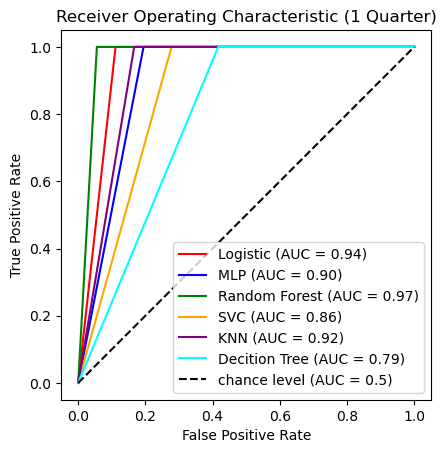

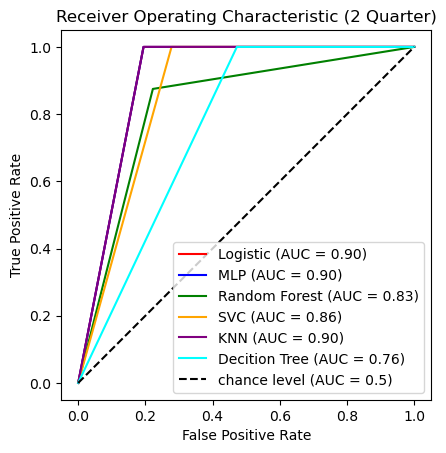

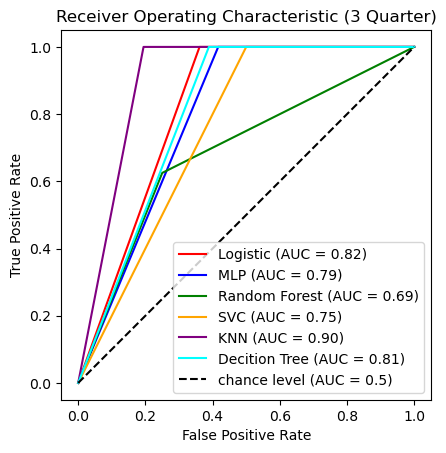

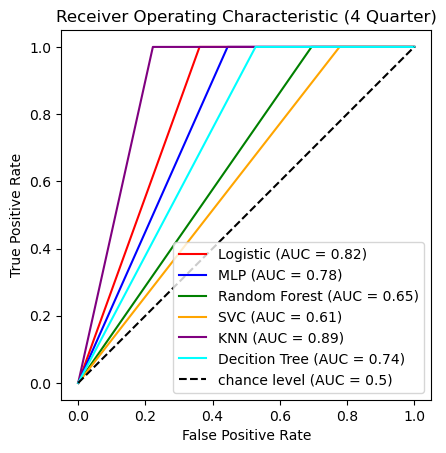

In [38]:
for lag in lag_periods:
    
    X = normalized_data.iloc[:-lag,:]
    y = high_failures[lag:]

    X_train,X_test,Y_train,Y_test = train_test_split(X, y, train_size=0.7, random_state=42, shuffle=False);

    for model, name, color in zip(models,models_name,colors):
        classifier = model
        y_score = classifier.fit(X_train, Y_train).predict(X_test)
        
        # Compute micro-average ROC curve and ROC area
        fpr, tpr, _ = roc_curve(Y_test, y_score)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, roc_auc), c=color)
        
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (" + str(lag) + ' Quarter)')
    plt.legend()
    plt.show()

## Variable contribution for the best model (Random Forest)

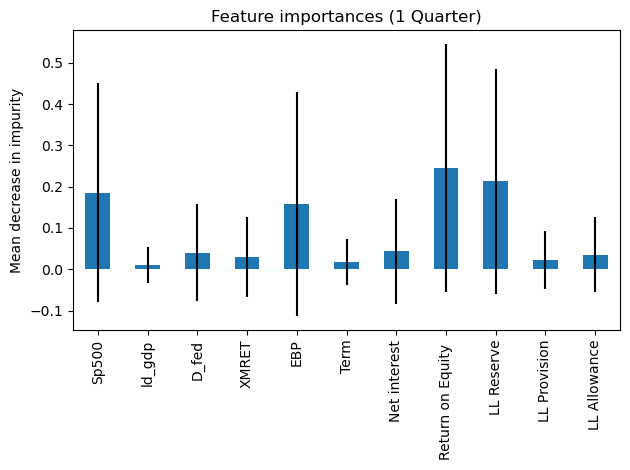

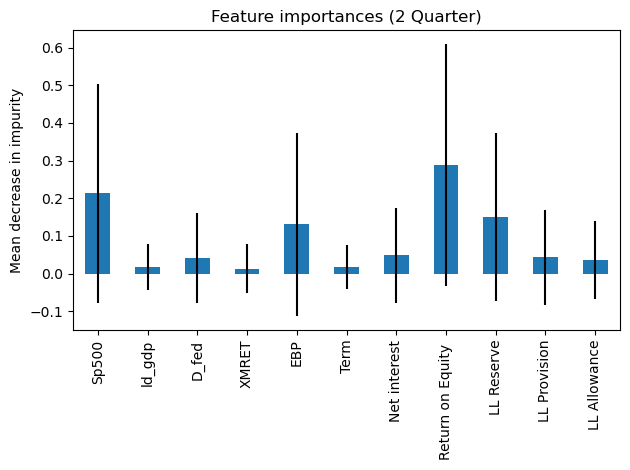

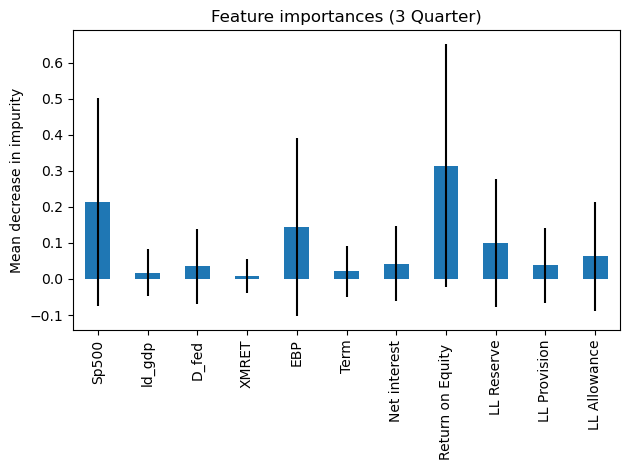

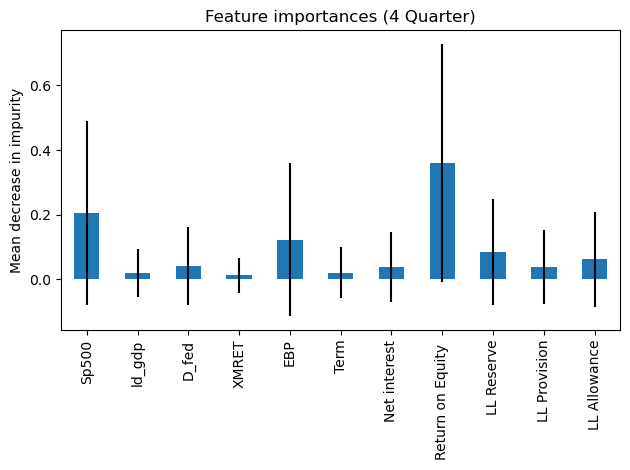

In [39]:
for lag in lag_periods:
    
    X = normalized_data.iloc[:-lag,:]
    y = high_failures[lag:]

    X_train,X_test,Y_train,Y_test = train_test_split(X, y, train_size=0.7, random_state=42, shuffle=False);

    best_classifier = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=2, random_state=42)
    y_score = best_classifier.fit(X_train, Y_train).predict(X_test)

    importances = best_classifier.feature_importances_
    forest_importances = pd.Series(importances, index=feature_names)
    std = np.std([tree.feature_importances_ for tree in best_classifier.estimators_], axis=0)
    
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances (" + str(lag) + ' Quarter)')
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()

    plt.show()